<font color='black'>
Content:
    

1. [Import Necessary Libraries](#1)<br>
2. [Loading the Data Set](#2)<br>
3. [Normalization, Reshape and Label Encoding](#3)<br>
4. [Train Test Split](#4)<br>
5. [Create CNN Model](#5)<br>
6. [Define Optimizer](#6)<br>
7. [Compile Model](#7)<br>
8. [Data Augmentation](#8)<br>
9. [Fit the Model](#9)<br>
10. [Evaluate the Model](#10)<br>
11. [Confusion Matrix](#11)<br>
12. [Prediction and Submission](#12)
    
    
    
    
    
    
  

<a id="1"></a><br>
## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))


import itertools

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['digit-recognizer']


<a id="2"></a><br>
## Loading the Data Set


In [2]:
train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print("shape of train: ",train.shape)
train.head(10)

shape of train:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print("shape of test: ",test.shape)
test.head(10)

shape of test:  (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train=train["label"]
x_train=train.drop(labels=["label"],axis=1)

In [5]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

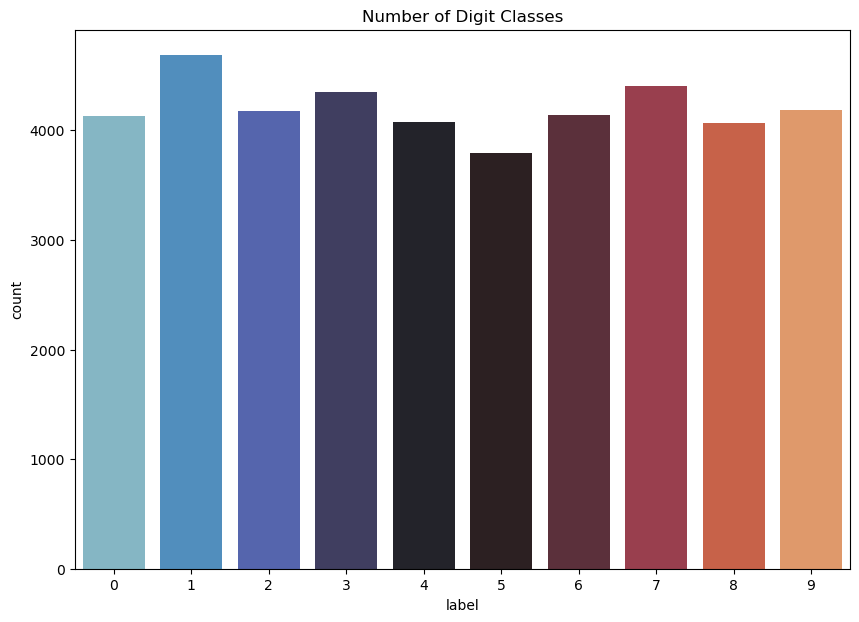

In [7]:
plt.figure(figsize=(10,7))
g=sns.countplot(x=y_train,palette="icefire")
plt.title("Number of Digit Classes")
y_train.value_counts()

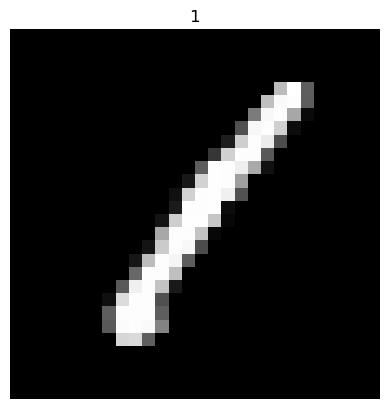

In [8]:
#plot some samples
img=x_train.iloc[0].values
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")#eksen etiketlerini kadırmak için kullanılır
plt.show()

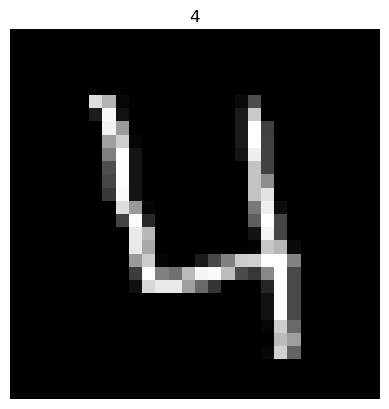

In [9]:
#plot some sapmles
img=x_train.iloc[3].values
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")#eksen etiketlerini kadırmak için kullanılır
plt.show()

<a id="3"></a><br>
## Normalization, Reshape and Label Encoding

    

In [10]:
#Normalize the data
x_train=x_train/255.0
test=test/255.0
print("x_train shape: ",x_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [11]:
#reshape
x_train = x_train.values
test = test.values

# Now you can reshape the arrays
x_train = x_train.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

print("x_train shape: ", x_train.shape)
print("test shape: ", test.shape)


x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [12]:
print("x_train shape: ",x_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [13]:
#Label Encoding
from keras.utils.np_utils import to_categorical #convert one hot encoding
y_train=to_categorical(y_train,num_classes=10)#etiketler 10 boyutlu kategorik vektörlere dönüştürülür.

<a id="4"></a><br>
## Train Test Split
    *test size is %10
    *train size is %90

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [15]:
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_val.shape)

x_train shape:  (37800, 28, 28, 1)
x_test shape:  (4200, 28, 28, 1)
y_train shape:  (37800, 10)
y_test shape:  (4200, 10)


<a id="5"></a><br>
## Create CNN Model

In [16]:

#create CNN
model=Sequential()

model.add(Conv2D(filters=8,kernel_size=(5,5),padding='Same',
                activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))
#
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',
                activation='relu'))
          
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.25))

#fully connected 

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


<a id="6"></a><br>
## Define Optimizer

In [17]:
#define the optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

<a id="7"></a><br>
## Compile Model


In [18]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
epochs=25
batch_size=120

<a id="8"></a><br>
## Data Augmentation


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

<a id="9"></a><br>
## Fit the Model

In [20]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/25
315/315 [==============================] - 16s 48ms/step - loss: 0.8291 - accuracy: 0.7255 - val_loss: 0.1406 - val_accuracy: 0.9607
Epoch 2/25
315/315 [==============================] - 15s 46ms/step - loss: 0.3336 - accuracy: 0.8953 - val_loss: 0.0924 - val_accuracy: 0.9698
Epoch 3/25
315/315 [==============================] - 14s 45ms/step - loss: 0.2505 - accuracy: 0.9224 - val_loss: 0.0765 - val_accuracy: 0.9786
Epoch 4/25
315/315 [==============================] - 14s 45ms/step - loss: 0.2115 - accuracy: 0.9340 - val_loss: 0.0647 - val_accuracy: 0.9800
Epoch 5/25
315/315 [==============================] - 15s 46ms/step - loss: 0.1961 - accuracy: 0.9404 - val_loss: 0.0586 - val_accuracy: 0.9829
Epoch 6/25
315/315 [==============================] - 15s 46ms/step - loss: 0.1742 - accuracy: 0.9469 - val_loss: 0.0526 - val_accuracy: 0.9850
Epoch 7/25
315/315 [==============================] - 15s 47ms/step - loss: 0.1637 - accuracy: 0.9483 - val_loss: 0.0518 - val_accuracy:

<a id="10"></a><br>
## Evaluate the Model

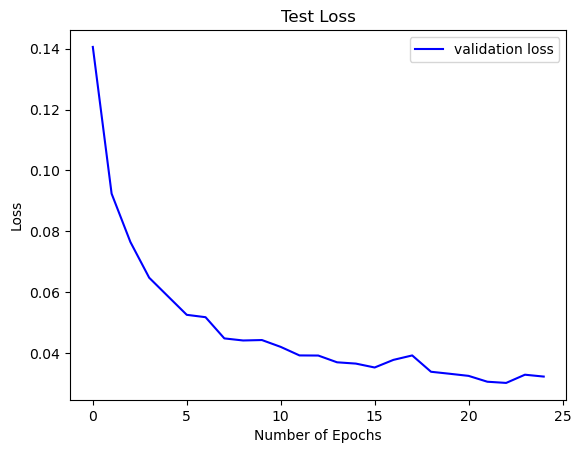

In [21]:
plt.plot(history.history["val_loss"],color='b',label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<a id="11"></a><br>
## Confusion Matrix

132/132 [==============================] - 1s 7ms/step


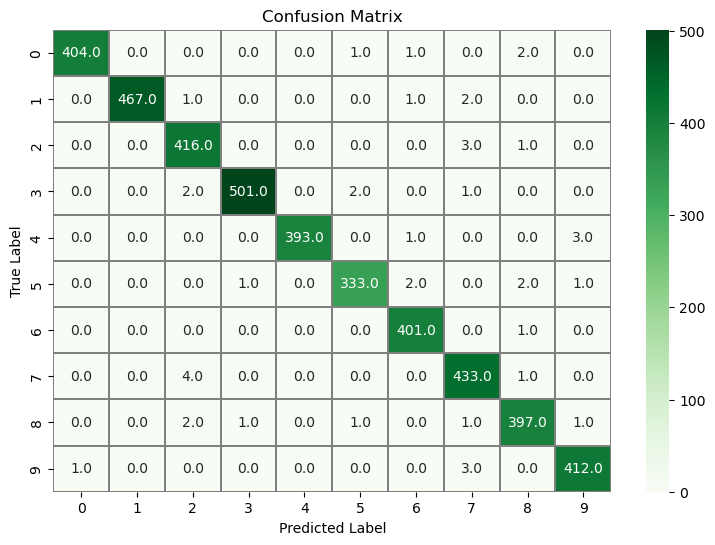

In [22]:
import seaborn as sns
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
#plot the confusion matrix,
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.01,cmap="Greens",linecolor="gray",fmt='.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



In [23]:
for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))
    print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

Class: 0
Number of Wrong Prediction: 4 out of 1000
Percentage of True Prediction: 40.40%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 1
Number of Wrong Prediction: 4 out of 1000
Percentage of True Prediction: 46.70%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 2
Number of Wrong Prediction: 4 out of 1000
Percentage of True Prediction: 41.60%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 3
Number of Wrong Prediction: 5 out of 1000
Percentage of True Prediction: 50.10%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 4
Number of Wrong Prediction: 4 out of 1000
Percentage of True Prediction: 39.30%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 5
Number of Wrong Prediction: 6 out of 1000
Percentage of True Prediction: 33.30%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 6
Number of Wrong Prediction: 1 out of 1000
Percentage of True Prediction: 40.10%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 7
Number of Wrong Prediction: 5 out of 1000
Percentage of True Prediction: 43.30%
<<<<<<<<<<<<<<<<<<<<<<